In [2]:
import pandas as pd
import numpy as np
from paretoset import paretoset
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

ideal_point = np.array([1, 1, 1])

df = pd.read_csv('/results/moo/bertopic_multi_guardian.csv')
df_moo = df[['values_0', 'values_1', 'values_2']]

scaler = MinMaxScaler()
df_moo = scaler.fit_transform(df_moo)

mask = paretoset(df_moo, sense=["max", "max", "min"]) # conhernece [-1,1], diversity [0, 1], perplexity [1, inf]

paretoset_solutions = df_moo[mask]
distance = euclidean_distances(paretoset_solutions, ideal_point.reshape(1, -1))
index = np.argmin(distance)

# print(distance)
# print(index)
print(df.iloc[index])

number                                         14
values_0                                  0.13809
values_1                                 0.988614
values_2                                 1.446915
datetime_start         2024-08-26 17:25:38.831891
datetime_complete      2024-08-26 17:32:37.937633
duration                   0 days 00:06:59.105742
params_n_clusters                              20
params_n_components                            11
params_n_gram                                   1
params_n_neighbors                             19
state                                    COMPLETE
Name: 14, dtype: object


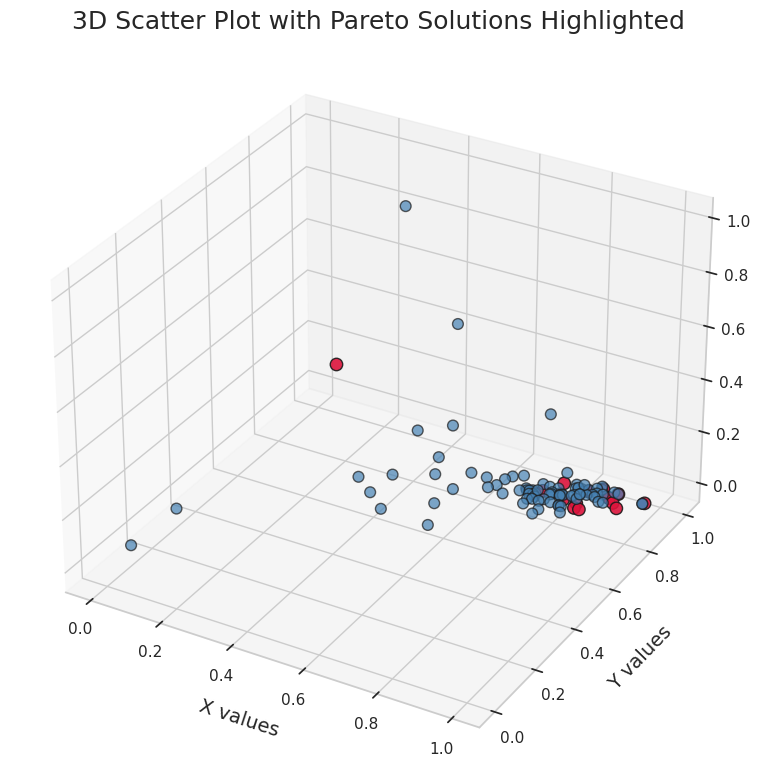

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Seaborn style for aesthetics
sns.set(style="whitegrid")

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot non-Pareto solutions in a pleasant color palette (e.g., cool blues)
ax.scatter(df_moo[~mask][:, 0], df_moo[~mask][:, 1], df_moo[~mask][:, 2], 
           color='steelblue', label='Non-Pareto', s=60, alpha=0.7, edgecolor='k')

# Plot Pareto solutions in a contrasting color (e.g., warm red)
ax.scatter(df_moo[mask][:, 0], df_moo[mask][:, 1], df_moo[mask][:, 2], 
           color='crimson', label='Pareto-optimal', s=80, alpha=0.9, edgecolor='k')

# Customize labels and add title with a larger font size for readability
ax.set_xlabel("X values", fontsize=14, labelpad=10)
ax.set_ylabel("Y values", fontsize=14, labelpad=10)
ax.set_zlabel("Z values", fontsize=14, labelpad=10)
plt.title("3D Scatter Plot with Pareto Solutions Highlighted", fontsize=18)

# Add a legend with a nicer location and font size
plt.legend(loc='best', fontsize=12)

# Improve grid visibility and set a color
ax.grid(True, linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
